# Задача: Знайти найдовшу спільну підпослідовність (LCS) за алгоритмом Хаббарда

## Контрольні питання

1. **У чому полягає задача знаходження найдовшої спільної підпослідовності (LCS)?**  
   Задача полягає у пошуку максимальної за довжиною підпослідовності, яка одночасно є підпослідовністю для обох заданих послідовностей символів.

2. **Які головні методи можна використовувати для знаходження найдовшої спільної підпослідовності?**  
   Основні методи — це динамічне програмування, алгоритм Хаббарда та рекурсивні підходи з мемоізацією.

3. **Як працює алгоритм динамічного програмування для знаходження LCS?**  
   Він створює матрицю, де кожен елемент dp[i][j] зберігає довжину LCS для підпослідовностей довжиною i та j відповідно, поступово заповнюючи її на основі порівняння символів.

4. **Як працює алгоритм Хаббарда для знаходження LCS?**  
   Алгоритм Хаббарда оптимізує стандартний метод динамічного програмування, зменшуючи використання пам’яті та покращуючи швидкодію за допомогою поділу задачі та злиття результатів.

5. **Які переваги та недоліки алгоритмів динамічного програмування та Хаббарда для знаходження LCS?**  
   - ДП простий у реалізації, але потребує багато пам’яті.  
   - Хаббард ефективніший по пам’яті і швидкості, але складніший для розуміння та реалізації.

6. **Які існують практичні застосування для задачі знаходження найдовшої спільної підпослідовності?**  
   Вирівнювання послідовностей у біоінформатиці, порівняння текстів, системи контролю версій, аналіз даних.

---

## Код для пошуку LCS за алгоритмом Хаббарда (Python)


In [2]:
def lcs_length(a, b):
    n, m = len(a), len(b)
    dp = [0] * (m + 1)
    for i in range(1, n + 1):
        prev = 0
        for j in range(1, m + 1):
            temp = dp[j]
            if a[i - 1] == b[j - 1]:
                dp[j] = prev + 1
            else:
                dp[j] = max(dp[j], dp[j - 1])
            prev = temp
    return dp

def hirschberg(a, b):
    if len(a) == 0:
        return ""
    elif len(a) == 1:
        return a if a in b else ""
    else:
        i = len(a) // 2
        l1 = lcs_length(a[:i], b)
        l2 = lcs_length(a[i:][::-1], b[::-1])
        k = max(range(len(b) + 1), key=lambda j: l1[j] + l2[len(b) - j])
        return hirschberg(a[:i], b[:k]) + hirschberg(a[i:], b[k:])

# Приклад використання
a = "12345"
b = "54321"
result = hirschberg(a, b)
print("Найдовша спільна підпослідовність:", result)

Найдовша спільна підпослідовність: 5


## Візуалізація цього коду

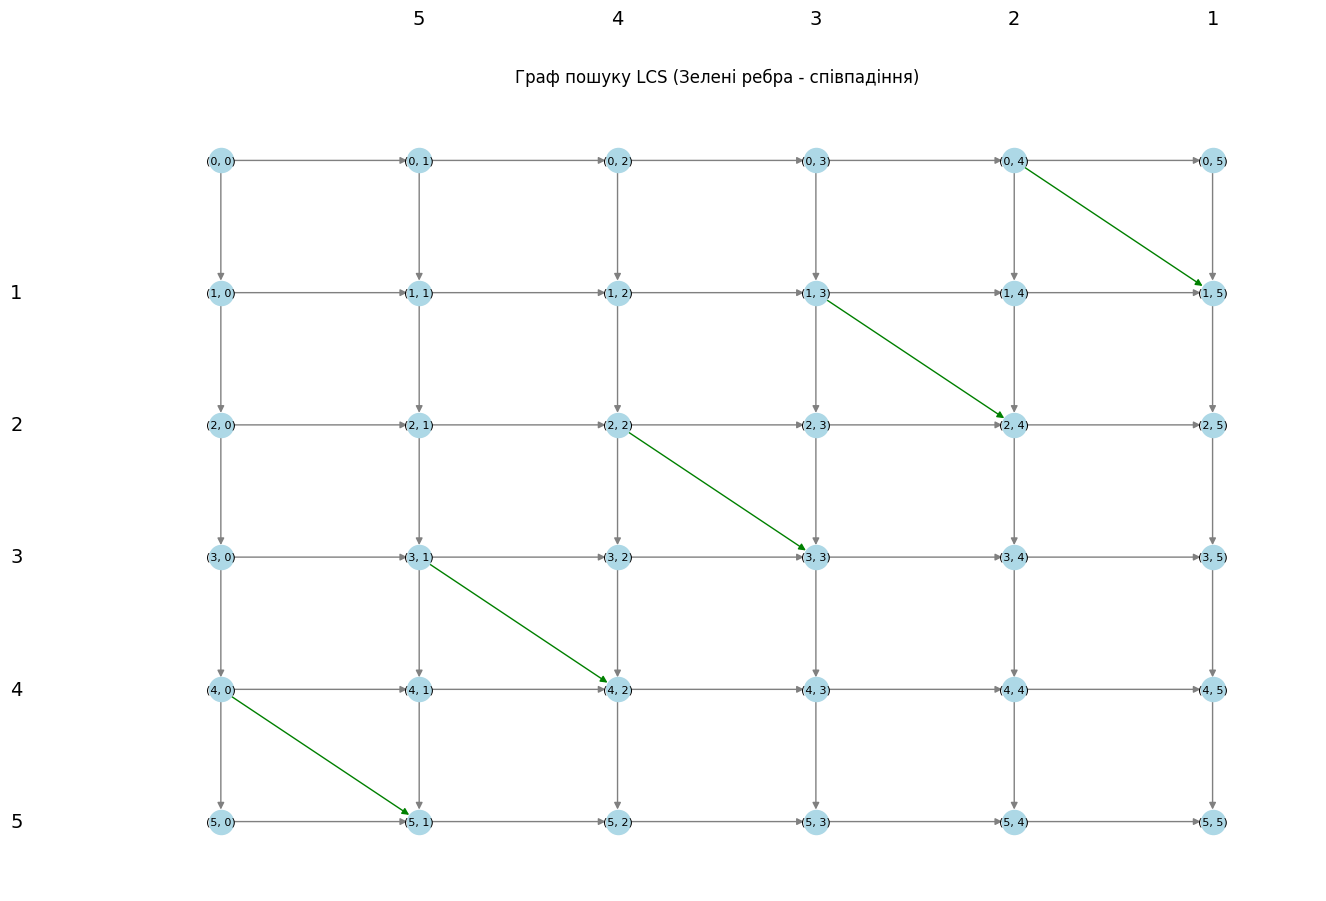

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def build_lcs_graph(a, b):
    G = nx.DiGraph()
    n, m = len(a), len(b)

    # Добавляем вершины с координатами для визуализации
    for i in range(n+1):
        for j in range(m+1):
            G.add_node((i, j))

    # Добавляем ребра по всем возможным переходам (i,j) -> (i+1,j), (i,j+1), (i+1,j+1 если символы совпадают)
    for i in range(n+1):
        for j in range(m+1):
            if i < n:
                G.add_edge((i, j), (i+1, j), color='grey', style='dotted')  # движение по первой строке
            if j < m:
                G.add_edge((i, j), (i, j+1), color='grey', style='dotted')  # движение по второй строке
            if i < n and j < m and a[i] == b[j]:
                G.add_edge((i, j), (i+1, j+1), color='green', style='solid')  # совпадение символов

    return G

def draw_lcs_graph(G, a, b):
    pos = {(i, j): (j, -i) for i, j in G.nodes()}  # Позиции для визуализации
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    styles = [G[u][v]['style'] for u,v in edges]

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, node_color='lightblue', edge_color=colors)

    # Добавим подписи к узлам с символами строк
    for i in range(len(a)+1):
        plt.text(-1, -i, a[i-1] if i > 0 else '', fontsize=14, ha='right', va='center')
    for j in range(len(b)+1):
        plt.text(j, 1, b[j-1] if j > 0 else '', fontsize=14, ha='center', va='bottom')

    plt.title("Граф пошуку LCS (Зелені ребра - співпадіння)")
    plt.axis('off')
    plt.show()

# Пример использования:
a = "12345"
b = "54321"

G = build_lcs_graph(a, b)
draw_lcs_graph(G, a, b)
